# Electric Vehicle Charging Locations with Census Variable Geospatial Data Analysis

In this notebook, we are going to look at electric vehicle locations in accordance to census variables with in Connecticut with a later focus on Hartford County.

Goal:

To understand whether residents in proximity to electric charging stations can afford an electric car and use these charging stations

This notebook will show:

-Inferences between where electric charging stations are situated in proximity to train stations and highway routes 

-Data analysis on counties and county Subdivisions (Towns or Cities) on a census tract and block group level

-Data visualizations of census varibles and electric charging stations with maps


In [ ]:
import shapes_data as sd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import collections
# includes packages, data, and shapes

# Variables

electric_charging_stations, 
census_varsbg,
census_varscsb (county subdivision),
fairfield_county_csb(fairfield county subdivisions),
ecs_locations (electric charging station shape),
ct_routes (highway shape),
joined_data_bg (joined blockgroup shape and census data),
county_fp1 (blockgroup fairfield county towns shape),
ct_railroads (connecticut railroads shape),
ct_blockgroup (ct blockgroup shape),
ct_towns (ct towns shape),
ct_states (ct states shape),
ct_county (ct county shape)

In [22]:
#station_count
cities = set(sd.electric_charging_stations.City)
station_city=[]
station_city_unique=[]
for cit in sd.electric_charging_stations['City'].values:
    station_city.append(cit)
for city in cities:
    station_city_unique.append(city)
frequency = collections.Counter(station_city)
freq=dict(frequency)
df_city_count = pd.DataFrame()
city_name = []
count_name = []
for key, value in freq.items():
    city_name.append(key)
    count_name.append(value)
df_city_count['city or town name']=city_name
df_city_count['number of electric charging stations']=count_name
df_city_count.to_csv('station_count.csv')
#electric charging station count greater than or equal to 10
df_city_count_goe_10=df_city_count.loc[
    df_city_count['number of electric charging stations']>=10
].sort_values(by=['number of electric charging stations'],ascending=False)
df_city_count_goe_10

city or town name  number of electric charging stations
38          Stamford                                    21
4          Fairfield                                    20
34          Hartford                                    20
14         New Haven                                    13
57           Danbury                                    12
55           Milford                                    11
37          Westport                                    10

/home/michael/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


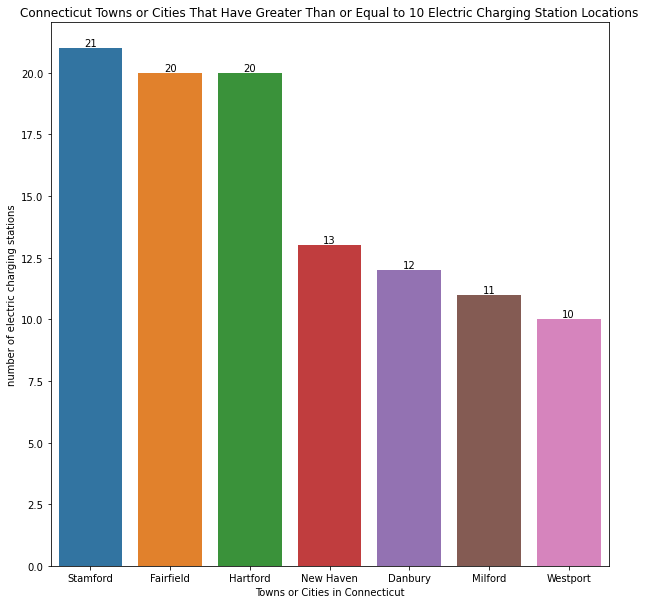

In [29]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot("city or town name",
                 "number of electric charging stations", 
                 data=df_city_count_goe_10)
ax.bar_label(ax.containers[0])
ax.set(xlabel='Towns or Cities in Connecticut',
       ylabel = 'number of electric charging stations',
       title = 'Connecticut Towns or Cities That Have Greater Than or Equal to 10 Electric Charging Station Locations'
      )
plt.show()

# The towns and cities of Connecticut that have the largest number of electric charging stations are in Fairfield, Hartford, and Stamford. This may be because of train stations or the end of highways where electric charging stations may be located. The cities and towns with the largest number of electric charging stations are Stamford, Fairfield, and Hartford.

In [3]:
# Creating County Labels
county_pt = pd.DataFrame()
county_pt['coords'] = sd.ct_county.geometry.apply(lambda x: x.representative_point().coords[:])
county_pt['coords'] = [coords[0] for coords in county_pt['coords']]
county_pt['X'] = [coords[0] for coords in county_pt['coords']]
county_pt['Y'] = [coords[1] for coords in county_pt['coords']]
county_pt['name']=sd.ct_county['NAME']

In [4]:
#Creating County subdivison labels

county_subdiv_pt = pd.DataFrame()
county_subdiv_pt['coords'] = sd.ct_towns.geometry.apply(lambda x: x.representative_point().coords[:])
county_subdiv_pt['coords'] = [coords[0] for coords in county_subdiv_pt['coords']]
county_subdiv_pt['X'] = [coords[0] for coords in county_subdiv_pt['coords']]
county_subdiv_pt['Y']=[coords[1] for coords in county_subdiv_pt['coords']]
#Column for name of County Subdivision
county_subdiv_pt['name'] = sd.ct_towns['NAME']
county_subdiv_pt

coords          X          Y  \
0            (-71.95376055452044, 41.7843355) -71.953761  41.784335   
1             (-72.31155913283288, 41.989042) -72.311559  41.989042   
2               (-72.160221819909, 41.989042) -72.160222  41.989042   
3    (-72.47924217979349, 41.404608499999995) -72.479242  41.404608   
4            (-72.78133862504019, 41.3680555) -72.781339  41.368055   
..                                        ...        ...        ...   
164          (-72.23346813037074, 41.3623815) -72.233468  41.362381   
165            (-72.1014697163071, 41.346275) -72.101470  41.346275   
166           (-73.42755108822996, 41.111442) -73.427551  41.111442   
167            (-73.42868302191533, 41.98401) -73.428683  41.984010   
168   (-73.32833048585734, 41.84916749999999) -73.328330  41.849167   

               name  
0          Brooklyn  
1          Stafford  
2             Union  
3           Chester  
4    North Branford  
..              ...  
164       East Lyme  
165      New London  
166         Norwalk  
167       Salisbury  
168        Cornwall  

[169 rows x 4 columns]

In [5]:
# Extracting the Minimum and Max values for the color bars of the maps

# Population Density min max
min_pop_de_bg=sd.joined_data_bg['SE_A00002_002'].min()
max_pop_de_bg=sd.joined_data_bg['SE_A00002_002'].max()
min_pop_de_csb=sd.joined_data_csb['SE_A00002_002'].min()
max_pop_de_csb=sd.joined_data_csb['SE_A00002_002'].max()
# % white min max
min_perc_white_bg=sd.joined_data_bg['PCT_SE_A03001_002'].min()
max_avg_white_bg=sd.joined_data_bg['PCT_SE_A03001_002'].max()
min_perc_white_csb=sd.joined_data_csb['PCT_SE_A03001_002'].min()
max_perc_white_csb=sd.joined_data_csb['PCT_SE_A03001_002'].max()

# % black min max
min_perc_black_bg=sd.joined_data_bg['PCT_SE_A03001_003'].min()
max_perc_black_bg=sd.joined_data_bg['PCT_SE_A03001_003'].max()
min_perc_black_csb=sd.joined_data_csb['PCT_SE_A03001_003'].min()
max_perc_black_csb=sd.joined_data_csb['PCT_SE_A03001_003'].max()
# % asian min max
min_perc_asian_bg=sd.joined_data_bg['PCT_SE_A03001_005'].min()
max_perc_asian_bg=sd.joined_data_bg['PCT_SE_A03001_005'].max()
min_perc_asian_csb=sd.joined_data_csb['PCT_SE_A03001_005'].min()
max_perc_asian_csb=sd.joined_data_csb['PCT_SE_A03001_005'].max()
# Average income
min_avg_income_bg=sd.joined_data_bg['SE_A14008_001'].min()
max_avg_income_bg=sd.joined_data_bg['SE_A14008_001'].max()
min_avg_income_csb=sd.joined_data_csb['SE_A14008_001'].min()
max_avg_income_csb=sd.joined_data_csb['SE_A14008_001'].max()
#% Hispanic min max
min_perc_hispanic_bg=sd.joined_data_bg['PCT_SE_A04001_010'].min()
max_perc_hispanic_bg=sd.joined_data_bg['PCT_SE_A04001_010'].max()
min_perc_hispanic_csb=sd.joined_data_csb['PCT_SE_A04001_010'].min()
max_perc_hispanic_csb=sd.joined_data_csb['PCT_SE_A04001_010'].max()
#% less highschool edu min max
min_perc_lesshs_bg=sd.joined_data_bg['PCT_SE_A12001_002'].min()
max_perc_lesshs_bg=sd.joined_data_bg['PCT_SE_A12001_002'].max()
min_perc_lesshs_csb=sd.joined_data_csb['PCT_SE_A12001_002'].min()
max_perc_lesshs_csb=sd.joined_data_csb['PCT_SE_A12001_002'].max()
#% highschool grad min max
min_perc_hsgrad_bg=sd.joined_data_bg['PCT_SE_A12001_003'].min()
max_perc_hsgrad_bg=sd.joined_data_bg['PCT_SE_A12001_003'].max()
min_perc_hsgrad_csb=sd.joined_data_csb['PCT_SE_A12001_003'].min()
max_perc_hsgrad_csb=sd.joined_data_csb['PCT_SE_A12001_003'].max()
#% some college min max
min_perc_somecoll_bg=sd.joined_data_bg['PCT_SE_A12001_004'].min()
max_perc_somecoll_bg=sd.joined_data_bg['PCT_SE_A12001_004'].max()
min_perc_somecoll_csb=sd.joined_data_csb['PCT_SE_A12001_004'].min()

max_perc_somecoll_csb=sd.joined_data_csb['PCT_SE_A12001_004'].max()
#% bachelors min max
min_perc_bachdg_bg=sd.joined_data_bg['PCT_SE_A12001_005'].min()
max_perc_bachdg_bg=sd.joined_data_bg['PCT_SE_A12001_005'].max()
min_perc_bachdg_csb=sd.joined_data_csb['PCT_SE_A12001_005'].min()
max_perc_bachdg_csb=sd.joined_data_csb['PCT_SE_A12001_005'].max()
# % masters min max
min_perc_masters_bg=sd.joined_data_bg['PCT_SE_A12001_006'].min()
max_perc_masters_bg=sd.joined_data_bg['PCT_SE_A12001_006'].max()
min_perc_masters_csb=sd.joined_data_csb['PCT_SE_A12001_006'].min()
max_perc_masters_csb=sd.joined_data_csb['PCT_SE_A12001_006'].max()
# % professional degree min max
min_perc_profdg_bg=sd.joined_data_bg['PCT_SE_A12001_007'].min()
max_perc_profdg_bg=sd.joined_data_bg['PCT_SE_A12001_007'].max()
min_perc_profdg_csb=sd.joined_data_csb['PCT_SE_A12001_007'].min()
max_perc_profdg_csb=sd.joined_data_csb['PCT_SE_A12001_007'].max()
# % doctorate degree min max
min_perc_doc_bg=sd.joined_data_bg['PCT_SE_A12001_008'].min()
max_perc_doc_bg=sd.joined_data_bg['PCT_SE_A12001_008'].max()
min_perc_doc_csb=sd.joined_data_csb['PCT_SE_A12001_008'].min()
max_perc_doc_csb=sd.joined_data_csb['PCT_SE_A12001_008'].max()
# % civilian pop 16 over employed
min_perc_employed_bg=sd.joined_data_bg['PCT_SE_A17005_002'].min()
max_perc_employed_bg=sd.joined_data_bg['PCT_SE_A17005_002'].max()
min_perc_employed_csb=sd.joined_data_csb['PCT_SE_A17005_002'].min()
max_perc_employed_csb=sd.joined_data_csb['PCT_SE_A17005_002'].max()
# % civilian pop 16 over unemployed
min_perc_unemployed_bg=sd.joined_data_bg['PCT_SE_A17005_003'].min()
max_perc_unemployed_bg=sd.joined_data_bg['PCT_SE_A17005_003'].max()
min_perc_unemployed_csb=sd.joined_data_csb['PCT_SE_A17005_003'].min()
max_perc_unemployed_csb=sd.joined_data_csb['PCT_SE_A17005_003'].max()

# did not work at home less than 10 minutes

min_perc_nh_less10_bg =sd.joined_data_bg['PCT_SE_A09001_003'].min()
max_perc_nh_less10_bg = sd.joined_data_bg['PCT_SE_A09001_003'].max()

min_perc_nh_less10_csb =sd.joined_data_csb['PCT_SE_A09001_003'].min()
max_perc_nh_less10_csb = sd.joined_data_csb['PCT_SE_A09001_003'].max()
# % Did Not Work at Home Less Than 40 to 59 Minute Commute
min_perc_nh_40to59_bg =sd.joined_data_bg['PCT_SE_A09001_007'].min()
max_perc_nh_40to59_bg = sd.joined_data_bg['PCT_SE_A09001_007'].max()

min_perc_nh_40to59_csb =sd.joined_data_csb['PCT_SE_A09001_007'].min()
max_perc_nh_40to59_csb = sd.joined_data_csb['PCT_SE_A09001_007'].max()

# Mapping of Census Variables, Electric Charging Stations, Highways, and Train Routes

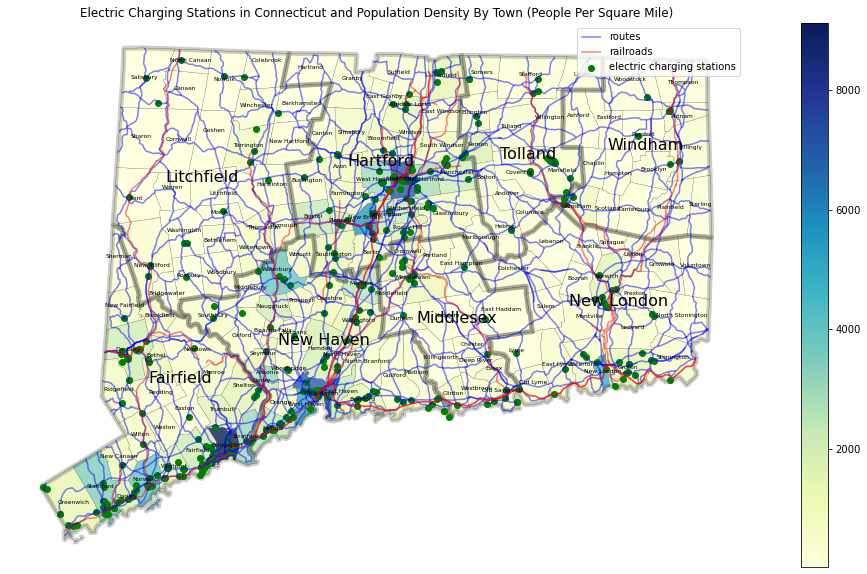

In [6]:
#population density
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
ax.plot(ax=ax, 
     markersize=50, 
     color='green',
     label='electric charging stations')
sd.ct_routes.plot(ax=ax,
               edgecolor='blue',
               linewidth=1.5,
               alpha=.5,
               label='routes')

sd.ct_railroads.plot(ax=ax,
                  edgecolor='red',
                  linewidth=1.5,
                  alpha=.5,
                  label='railroads')

sd.joined_data_csb.plot(ax=ax,
                      column='SE_A00002_002',
                      cmap='YlGnBu',
                      edgecolor='black',
                      linewidth=.2,
                      alpha=1)
sd.ct_county.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=5,
              alpha=.2)

sd.ecs_locations.plot(ax=ax,
            edgecolor='green',
            facecolor='green',
            linewidth=1,
            alpha=1,
            label='electric charging stations')
for idx, row in county_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=16)

for idx, row in county_subdiv_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=6)


sm = plt.cm.ScalarMappable(cmap='YlGnBu',
                           norm=plt.Normalize(vmin=min_pop_de_csb,
                                                            vmax=max_pop_de_csb))
sm._A = []
cbar = fig.colorbar(sm)



ax.legend()
ax.set(title = 'Electric Charging Stations in Connecticut and Population Density By Town (People Per Square Mile)')
plt.axis('off')
plt.show()

fig.set_size_inches(18.5, 10.5)
fig.savefig('01-Electric Charging Stations in Connecticut and Population Density By Town (People Per Square Mile).png', dpi=300)

# Population density appears to be higher in many areas of the counties that have electric charging stations. This may be because higher concentrations of population density are usually located next to train stations. The highest concentration in population density is in located in the eastern part of Fairfield County. Another explanation for the presence of higher population densities is that the locations are cities.

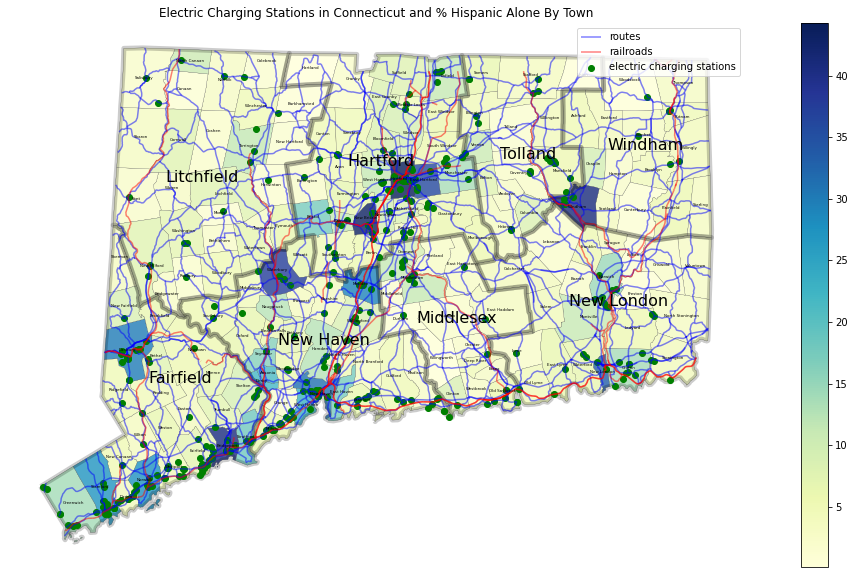

In [7]:
# % Hispanic Alone
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')

ax.plot(ax=ax, 
     markersize=50, 
     color='green',
     label='electric charging stations')
sd.ct_routes.plot(ax=ax,
               edgecolor='blue',
               linewidth=1.5,
               alpha=.5,
               label='routes')

sd.ct_railroads.plot(ax=ax,
                  edgecolor='red',
                  linewidth=1.5,
                  alpha=.5,
                  label='railroads')


sd.joined_data_csb.plot(ax=ax,
                      column='PCT_SE_A04001_010',
                      cmap='YlGnBu',
                      edgecolor='black',
                      linewidth=.2,
                      alpha=1)
sd.ct_county.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=5,
              alpha=.2)

sd.ecs_locations.plot(ax=ax,
            edgecolor='green',
            facecolor='green',
            linewidth=1,
            alpha=1,
            label='electric charging stations')

for idx, row in county_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=16)

for idx, row in county_subdiv_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=4)

#ct_states.plot(ax=ax,
              #facecolor='white',
              #edgecolor='black',
              #linewidth=1,
              #alpha=.2)
sm = plt.cm.ScalarMappable(cmap='YlGnBu',
                           norm=plt.Normalize(vmin=min_perc_hispanic_csb,
                                              vmax=max_perc_hispanic_csb))
sm._A = []
cbar = fig.colorbar(sm)


ax.legend()
ax.set(title = 'Electric Charging Stations in Connecticut and % Hispanic Alone By Town')
plt.axis('off')
plt.show()

fig.set_size_inches(18.5, 10.5)
fig.savefig('02-Electric Charging Stations in Connecticut and % Hispanic Alone By Town.png', dpi=300)

# It appears that there is a higher percentage of Hispanic residents in towns or cities in the center and southern parts of Hartford County, the upper part of New Haven County, south west in Windham County and south east in Fairfield County. What is interesting is that the higher percentage of Hispanic residents and electric charging stations are clustered in Hartford.

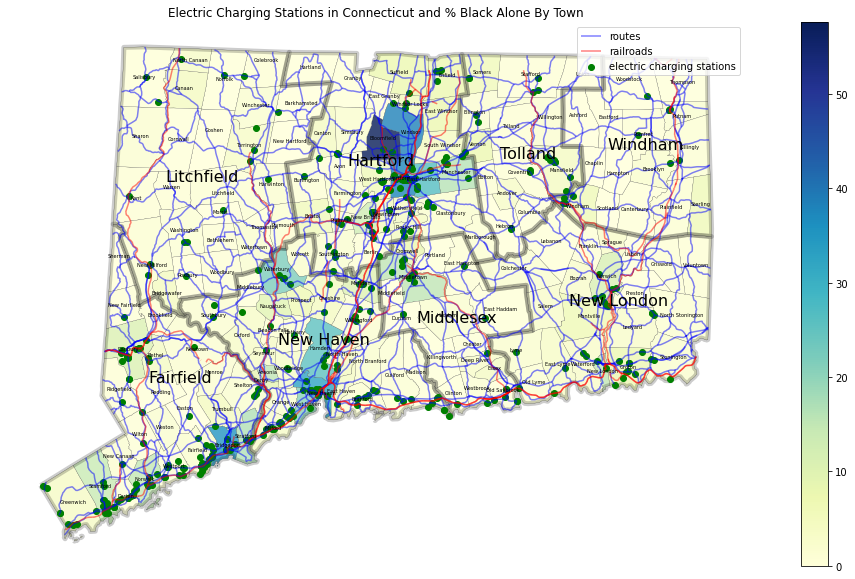

In [8]:

# % Black Alone
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
ax.plot(ax=ax, 
     markersize=50, 
     color='green',
     label='electric charging stations')
sd.ct_routes.plot(ax=ax,
               edgecolor='blue',
               linewidth=1.5,
               alpha=.5,
               label='routes')

sd.ct_railroads.plot(ax=ax,
                  edgecolor='red',
                  linewidth=1.5,
                  alpha=.5,
                  label='railroads')


sd.joined_data_csb.plot(ax=ax,
                      column='PCT_SE_A03001_003',
                      cmap='YlGnBu',
                      edgecolor='black',
                      linewidth=.2,
                      alpha=1)
sd.ct_county.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=5,
              alpha=.2)

sd.ecs_locations.plot(ax=ax,
            edgecolor='green',
            facecolor='green',
            linewidth=1,
            alpha=1,
            label='electric charging stations')
for idx, row in county_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=16)

for idx, row in county_subdiv_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=5)

sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=min_perc_black_csb,vmax=max_perc_black_csb))
sm._A = []
cbar = fig.colorbar(sm)


ax.legend()
ax.set(title = 'Electric Charging Stations in Connecticut and % Black Alone By Town')
plt.axis('off')
plt.show()

fig.set_size_inches(18.5, 10.5)
fig.savefig('03-Electric Charging Stations in Connecticut and % Black Alone By Town.png', dpi=300)

# There is a higher percentage of Black or African American population in town in Hartford county within the 30% to 50% range in the areas within proximity to electric charging station locations clusters.


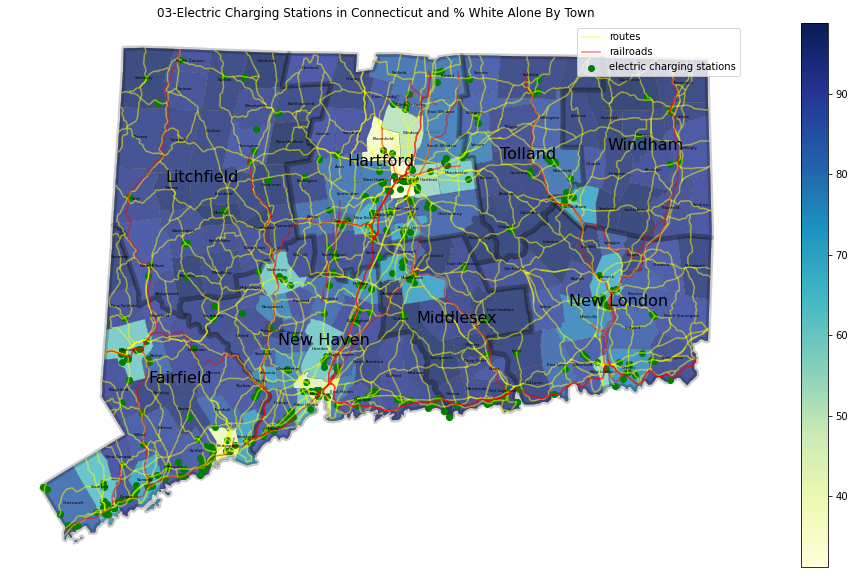

In [9]:
# % White Alone
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
ax.plot(ax=ax, 
     markersize=50, 
     color='green',
     label='electric charging stations')
sd.ct_routes.plot(ax=ax,
               edgecolor='yellow',
               linewidth=1.5,
               alpha=.5,
               label='routes')

sd.ct_railroads.plot(ax=ax,
                  edgecolor='red',
                  linewidth=1.5,
                  alpha=.5,
                  label='railroads')


sd.joined_data_csb.plot(ax=ax,
                      column='PCT_SE_A03001_002',
                      cmap='YlGnBu',
                      edgecolor='black',
                      linewidth=.2,
                      alpha=1)
sd.ct_county.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=5,
              alpha=.2)

sd.ecs_locations.plot(ax=ax,
            edgecolor='green',
            facecolor='green',
            linewidth=1,
            alpha=1,
            label='electric charging stations')
for idx, row in county_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=16)

for idx, row in county_subdiv_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=4)

sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=min_perc_white_csb,vmax=max_perc_white_csb))
sm._A = []
cbar = fig.colorbar(sm)

ax.legend()
ax.set(title = '03-Electric Charging Stations in Connecticut and % White Alone By Town')
plt.axis('off')
plt.show()


fig.set_size_inches(18.5, 10.5)
fig.savefig('04-Electric Charging Stations in Connecticut and % White Alone By Town.png', dpi=300)

# In the center of Hartford County there is a lower percentage of White residents with a clustering of electric charging stations. This area is approximately similar to the area with higher percentage of hispanic alone and block groups containing an average income less than or equal to $50,000

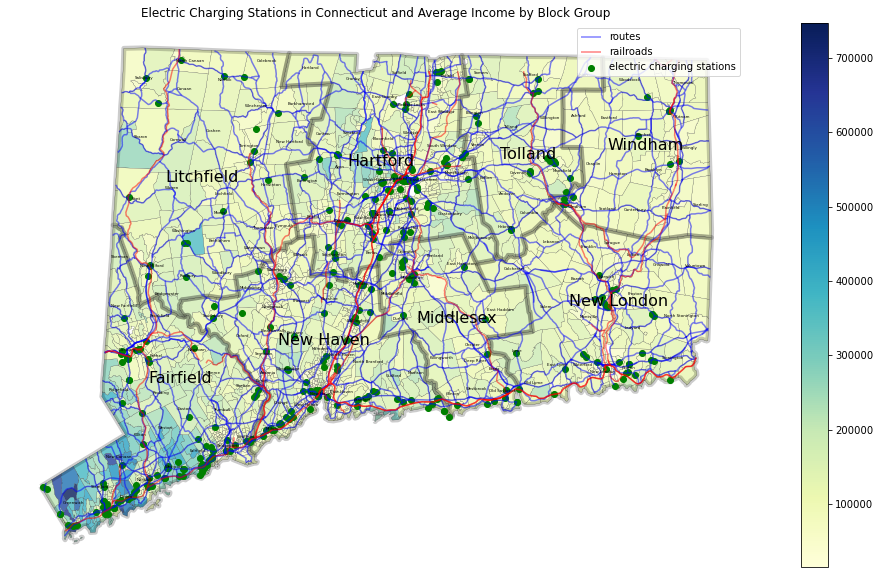

In [10]:
#Average income and Connecticut 

fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
ax.plot(ax=ax, 
     markersize=50, 
     color='green',
     label='electric charging stations')
sd.ct_routes.plot(ax=ax,
               edgecolor='blue',
               linewidth=1.5,
               alpha=.5,
               label='routes')
sd.ct_railroads.plot(ax=ax,
                  edgecolor='red',
                  linewidth=1.5,
                  alpha=.5,
                  label='railroads')


sd.joined_data_bg.plot(ax=ax,
                    column='SE_A14008_001',
                    cmap='YlGnBu',
                    edgecolor='black',
                    label='Average Household Income',
                    linewidth=.2,
                    alpha=1)
sd.ct_county.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=5,
              alpha=.2)

sd.ecs_locations.plot(ax=ax,
            edgecolor='green',
            facecolor='green',
            linewidth=1,
            alpha=1,
            label='electric charging stations')

for idx, row in county_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=16)

for idx, row in county_subdiv_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=4)

sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=min_avg_income_bg,vmax=max_avg_income_bg))
sm._A = []
cbar = fig.colorbar(sm)

ax.legend()
ax.set(title = 'Electric Charging Stations in Connecticut and Average Income by Block Group')
plt.axis('off')
plt.show()

fig.set_size_inches(18.5, 10.5)
fig.savefig('05-Electric Charging Stations and Average Income by Block Group.png', dpi=300)

# The highest average income appears to be in the southern part of Connecticut in Fairfield County. It may be interesting to see how these electric charging stations are in proximity of blockgroups that have residents with an average income of one hundred thousand dollars or less.

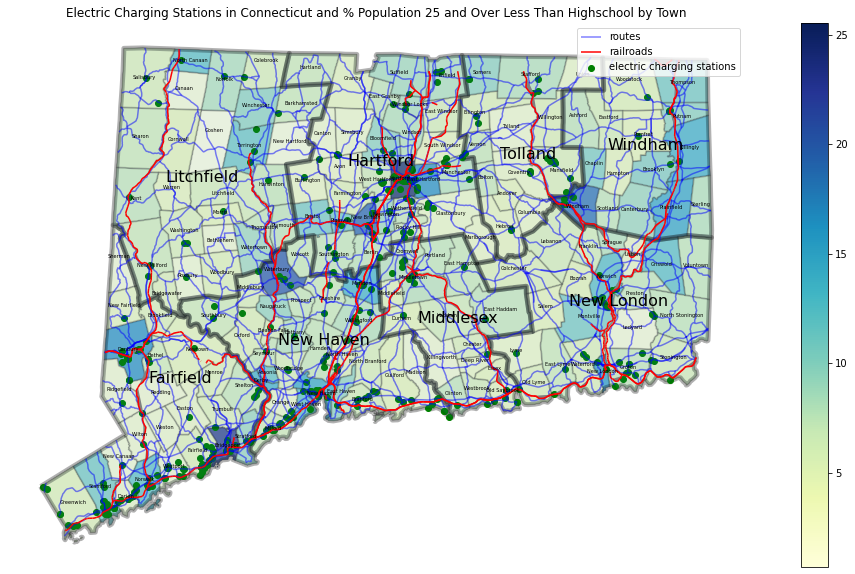

In [11]:
#population 25 years and over with less than 
#highschool educational attainment
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
ax.plot(ax=ax, 
     markersize=50, 
     color='green',
     label='electric charging stations')
sd.ct_routes.plot(ax=ax,
               edgecolor='blue',
               linewidth=1.5,
               alpha=.5,
               label='routes')
sd.ct_railroads.plot(ax=ax,
                  edgecolor='red',
                  facecolor='gray',
                  linewidth=1.5,
                  alpha=1,
                  label='railroads')
sd.joined_data_csb.plot(ax=ax, 
                column='PCT_SE_A12001_002',
                 cmap='YlGnBu',
                edgecolor='black',
                linewidth=.2,
                alpha=1)
sd.ct_county.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=5,
              alpha=.3)

sd.ecs_locations.plot(ax=ax,
            edgecolor='green',
            facecolor='green',
            linewidth=1,
            alpha=1,
            label='electric charging stations')
sd.ct_towns.plot(ax=ax,
              edgecolor='black',
              linewidth=2,
              alpha=.1)
sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=min_perc_lesshs_csb,vmax=max_perc_lesshs_csb))
sm._A = []
cbar = fig.colorbar(sm)
for idx, row in county_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=16)

for idx, row in county_subdiv_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=5)


ax.legend()
ax.set(title = 'Electric Charging Stations in Connecticut and % Population 25 and Over Less Than Highschool by Town')
plt.axis('off')

plt.show()

fig.set_size_inches(18.5, 10.5)
fig.savefig('06-Electric Charging Stations in Connecticut and % Population 25 and Over Less Than Highschool by Town.png', dpi=300)

# There is a higher percentage of residents in a town in Hartford county with a population 25 and over with less than a highschool education. There is a cluster of electric charging stations connected to railroads and routes in the center of Hartford county that show higher percentages of residents having an educational less than highschool.

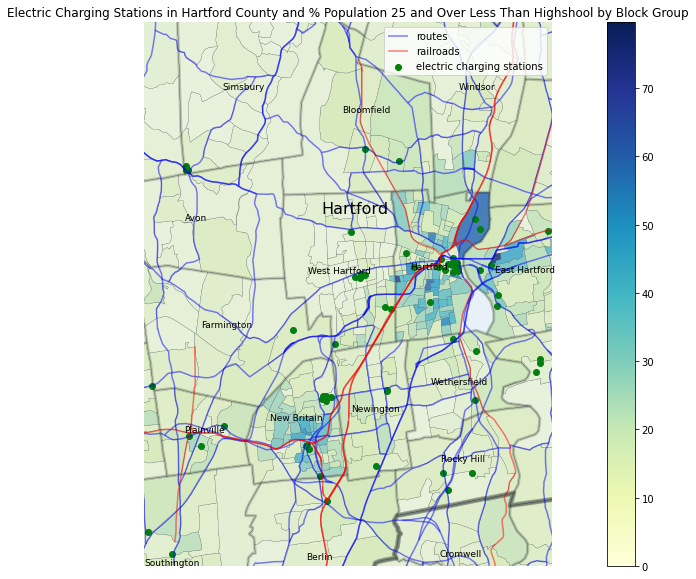

In [12]:
#population 25 and over less than highschool education attainment Hartford
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
ax.plot(ax=ax, 
     markersize=50, 
     color='green',
     label='electric charging stations')
sd.ct_routes.plot(ax=ax,
               edgecolor='blue',
               linewidth=1.5,
               alpha=.5,
               label='routes')
sd.ct_railroads.plot(ax=ax,
                  edgecolor='red',
                  linewidth=1.5,
                  alpha=.5,
                  label='railroads')


sd.joined_data_bg.plot(ax=ax,
                      column='PCT_SE_A12001_002',
                      cmap='YlGnBu',
                      edgecolor='black',
                     linewidth=.2,
                     alpha=1)
sd.ct_county.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=5,
              alpha=.2)


sd.ecs_locations.plot(ax=ax,
            edgecolor='green',
            facecolor='green',
            linewidth=1,
            alpha=1,
            label='electric charging stations')
sd.ct_towns.plot(ax=ax,
              edgecolor='black',
              linewidth=3,
              alpha=.1)

for idx, row in county_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=16)

for idx, row in county_subdiv_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=9)

            
sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=min_perc_lesshs_bg,vmax=max_perc_lesshs_bg))
sm._A = []
cbar = fig.colorbar(sm)


ax.set_ylim([41.6,41.9])
ax.set_xlim([-72.9,-72.6])
ax.legend()
ax.set(title = 'Electric Charging Stations in Hartford County and % Population 25 and Over Less Than Highshool by Block Group')
plt.axis('off')
plt.show()

fig.set_size_inches(18.5, 10.5)
fig.savefig('07-Electric Charging Stations in Hartford County and % Population 25 and Over Less Than Highschool by Block Group.png', dpi=300)

# There is a higher percentage of residents ages 25 years and over with less than a highschool educational attainment. Blockgroups in Hartford show higher concentrations closer to where electric charging station locations are clustered.

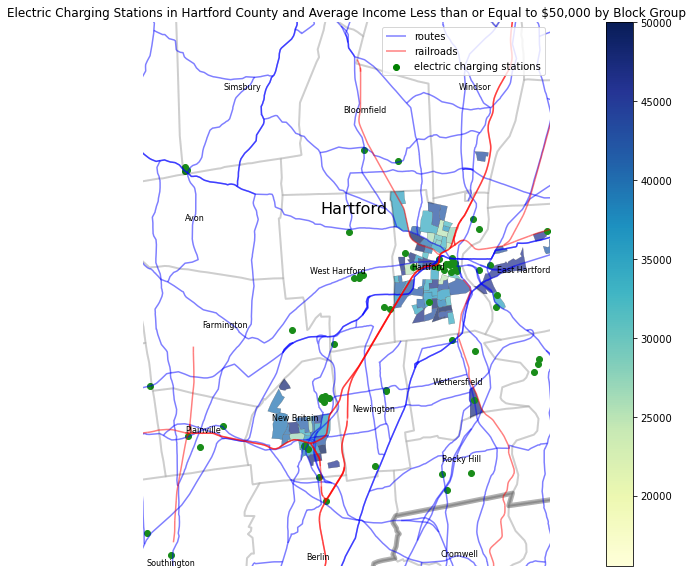

In [13]:
#Extract Average Income Less Than or equal to 50k

avg_bg_lesseq50k=sd.joined_data_bg[sd.joined_data_bg['SE_A14008_001']<=50000]


fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
ax.plot(ax=ax, 
     markersize=50, 
     color='green',
     label='electric charging stations')
sd.ct_routes.plot(ax=ax,
               edgecolor='blue',
               linewidth=1.5,
               alpha=.5,
               label='routes')
sd.ct_railroads.plot(ax=ax,
                  edgecolor='red',
                  linewidth=1.5,
                  alpha=.5,
                  label='railroads')


avg_bg_lesseq50k.plot(ax=ax,
                      column='SE_A14008_001',
                      cmap='YlGnBu',
                      edgecolor='black',
                      label='Average Household Income',
                     linewidth=.2,
                     alpha=1)
sd.ct_county.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=5,
              alpha=.2)


sd.ecs_locations.plot(ax=ax,
            edgecolor='green',
            facecolor='green',
            linewidth=1,
            alpha=1,
            label='electric charging stations')
sd.ct_towns.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=2,
              alpha=.1)

for idx, row in county_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=16)

for idx, row in county_subdiv_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=8)         
sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=min_avg_income_bg,vmax=50000))
sm._A = []
cbar = fig.colorbar(sm)

ax.set_ylim([41.6,41.9])
ax.set_xlim([-72.9,-72.6])
ax.legend()
ax.set(title = 'Electric Charging Stations in Hartford County and Average Income Less than or Equal to $50,000 by Block Group')
plt.axis('off')
plt.show()

fig.set_size_inches(18.5, 10.5)
fig.savefig('08-Electric Charging Stations Average Income Less Than $50,000 by Block Group.png', dpi=300)

# There a collection of blockgroups that are in the similar location to the town discussed in Hartford County with a clustering of electric charging stations and residents with an average income of less than fifty thousand dollars. The collection of blockgroups in the center of Hartford County has blockgroups that with an average income of approximately thirty thousand dollars. Specifically, in the town of Hartford there are a collection of blockgroups ranging between an average income of twenty five to forty thousand dollars. 

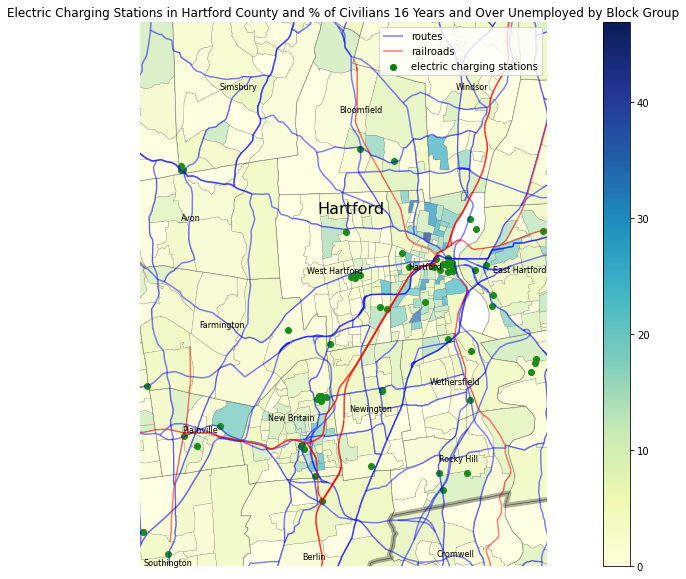

In [14]:
#Unemployment
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
ax.plot(ax=ax, 
     markersize=50, 
     color='green',
     label='electric charging stations')
sd.ct_routes.plot(ax=ax,
               edgecolor='blue',
               linewidth=1.5,
               alpha=.5,
               label='routes')
sd.ct_railroads.plot(ax=ax,
                  edgecolor='red',
                  linewidth=1.5,
                  alpha=.5,
                  label='railroads')


sd.joined_data_bg.plot(ax=ax,
                      column='PCT_SE_A17005_003',
                      cmap='YlGnBu',
                      edgecolor='black',
                     linewidth=.2,
                     alpha=1)
sd.ct_county.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=5,
              alpha=.2)


sd.ecs_locations.plot(ax=ax,
            edgecolor='green',
            facecolor='green',
            linewidth=1,
            alpha=1,
            label='electric charging stations')
sd.ct_towns.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=1,
              alpha=.1)

for idx, row in county_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=16)

for idx, row in county_subdiv_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=8)
    
sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=min_perc_unemployed_bg,vmax=max_perc_unemployed_bg))
sm._A = []
cbar = fig.colorbar(sm)

ax.set_ylim([41.6,41.9])
ax.set_xlim([-72.9,-72.6])
ax.legend()
ax.set(title = 'Electric Charging Stations in Hartford County and % of Civilians 16 Years and Over Unemployed by Block Group')
plt.axis('off')
plt.show()

fig.set_size_inches(18.5, 10.5)
fig.savefig('09-Electric Charging Stations in Hartford County and % Unemployed by Block Group.png', dpi=300)


# There are higher percentages of residents unemployed within proximity of these electric charging stations. For example, in Hartford there are blockgroups near the electric car charging stations that are with the range of ten to thirty percent and thirty to fourty percent.


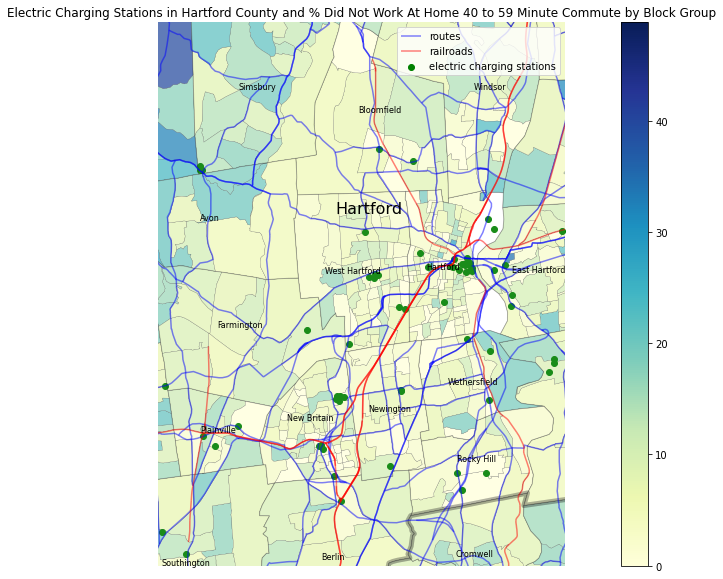

In [15]:
# % Did Not Work from Home 40 to 59 Minute Commute
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
ax.plot(ax=ax, 
     markersize=50, 
     color='green',
     label='electric charging stations')
sd.ct_routes.plot(ax=ax,
               edgecolor='blue',
               linewidth=1.5,
               alpha=.5,
               label='routes')
sd.ct_railroads.plot(ax=ax,
                  edgecolor='red',
                  linewidth=1.5,
                  alpha=.5,
                  label='railroads')


sd.joined_data_bg.plot(ax=ax,
                      column='PCT_SE_A09001_007',
                      cmap='YlGnBu',
                      edgecolor='black',
                     linewidth=.2,
                     alpha=1)
sd.ct_county.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=5,
              alpha=.2)


sd.ecs_locations.plot(ax=ax,
            edgecolor='green',
            facecolor='green',
            linewidth=1,
            alpha=1,
            label='electric charging stations')
sd.ct_towns.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=1,
              alpha=.1)

for idx, row in county_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=16)

for idx, row in county_subdiv_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=8)
    
sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=min_perc_nh_40to59_bg,vmax=max_perc_nh_40to59_bg))
sm._A = []
cbar = fig.colorbar(sm)

ax.set_ylim([41.6,41.9])
ax.set_xlim([-72.9,-72.6])
ax.legend()
ax.set(title = 'Electric Charging Stations in Hartford County and % Did Not Work At Home 40 to 59 Minute Commute by Block Group')
plt.axis('off')
plt.show()

fig.set_size_inches(18.5, 10.5)
fig.savefig('010-Electric Charging Stations in Hartford County and % Did Not Work At Home 40 to 59 Minute Commute by Block Group.png', dpi=300)


# Majority of the blockgroups show that the majority of residents that do not work at home and do not have a 40 to 59 minute commute. This means that residents that live in proximity of these electric vehicle charging stations may not have occupation or the financial means for it to be profitable to commute more than 40 to 59 minutes.

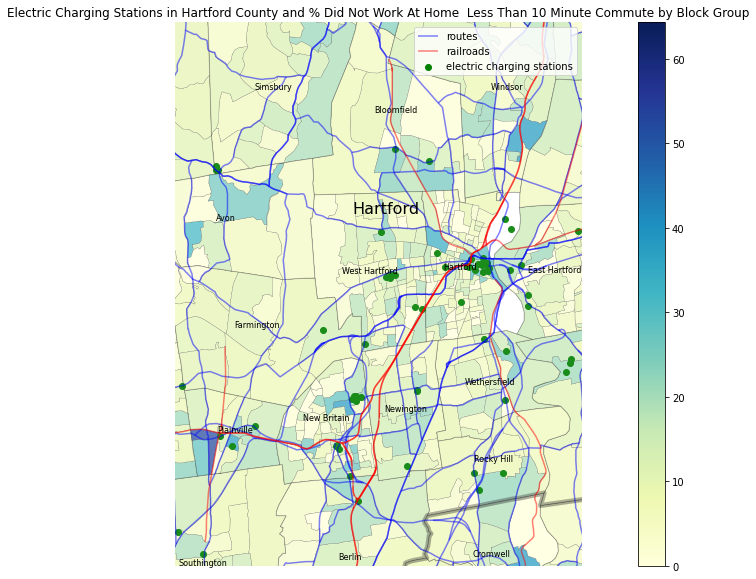

In [16]:
# % Did Not Work from Home Less Than 10 Minute Commute
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
ax.plot(ax=ax, 
     markersize=50, 
     color='green',
     label='electric charging stations')
sd.ct_routes.plot(ax=ax,
               edgecolor='blue',
               linewidth=1.5,
               alpha=.5,
               label='routes')
sd.ct_railroads.plot(ax=ax,
                  edgecolor='red',
                  linewidth=1.5,
                  alpha=.5,
                  label='railroads')


sd.joined_data_bg.plot(ax=ax,
                      column='PCT_SE_A09001_003',
                      cmap='YlGnBu',
                      edgecolor='black',
                     linewidth=.2,
                     alpha=1)
sd.ct_county.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=5,
              alpha=.2)

sd.ecs_locations.plot(ax=ax,
            edgecolor='green',
            facecolor='green',
            linewidth=1,
            alpha=1,
            label='electric charging stations')
sd.ct_towns.plot(ax=ax,
             facecolor='white',
              edgecolor='black',
              linewidth=1,
              alpha=.1)

for idx, row in county_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=16)

for idx, row in county_subdiv_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=8)

            
sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=min_perc_nh_less10_bg,vmax=max_perc_nh_less10_bg))
sm._A = []
cbar = fig.colorbar(sm)

ax.set_ylim([41.6,41.9])
ax.set_xlim([-72.9,-72.6])
ax.legend()
ax.set(title = 'Electric Charging Stations in Hartford County and % Did Not Work At Home  Less Than 10 Minute Commute by Block Group')
plt.axis('off')
plt.show()

fig.set_size_inches(18.5, 10.5)
fig.savefig('011-Electric Charging Stations in Hartford County and % Did Not Work At Home Less Than 10 Minute Commute by Block Group.png', dpi=300)


# Within the cluster of electric vehicle charging locations there are increased percentage of residents that have less than a ten minute commute. This means that residents may live near, work close by, or work at these electric vehicle charging stations.

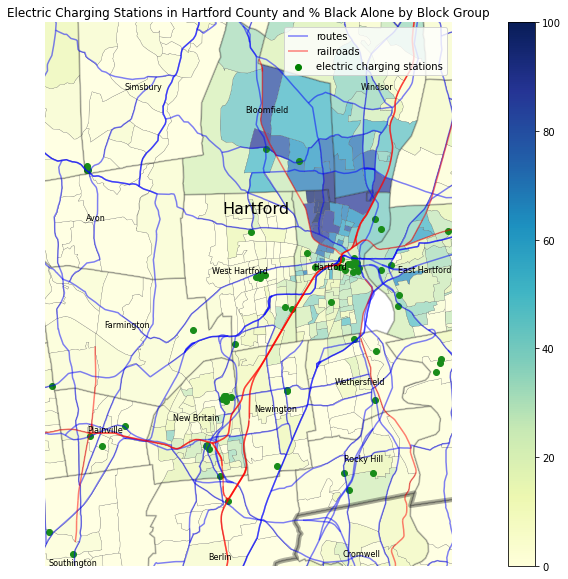

In [17]:
# Black Alone 
fig, ax = plt.subplots(figsize=(20,10),facecolor='white')
ax.plot(ax=ax, 
     markersize=50, 
     color='green',
     label='electric charging stations')
sd.ct_routes.plot(ax=ax,
               edgecolor='blue',
               linewidth=1.5,
               alpha=.5,
               label='routes')
sd.ct_railroads.plot(ax=ax,
                  edgecolor='red',
                  linewidth=1.5,
                  alpha=.5,
                  label='railroads')


sd.joined_data_bg.plot(ax=ax,
                      column='PCT_SE_A03001_003',
                      cmap='YlGnBu',
                      edgecolor='black',
                     linewidth=.2,
                     alpha=1)

sd.ct_county.plot(ax=ax,
              facecolor='white',
              edgecolor='black',
              linewidth=5,
              alpha=.2)

sd.ecs_locations.plot(ax=ax,
            edgecolor='green',
            facecolor='green',
            linewidth=1,
            alpha=1,
            label='electric charging stations')
sd.ct_towns.plot(ax=ax,
             facecolor='white',
              edgecolor='black',
              linewidth=2,
              alpha=.1)

for idx, row in county_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=16)

for idx, row in county_subdiv_pt.iterrows():   
    plt.annotate(text=row['name'], xy=row['coords'],
horizontalalignment='center', color='black',fontsize=8)
    
sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=min_perc_black_bg,vmax=max_perc_black_bg))
sm._A = []
cbar = fig.colorbar(sm)

ax.set_ylim([41.6,41.9])
ax.set_xlim([-72.9,-72.6])
ax.legend()
ax.set(title = 'Electric Charging Stations in Hartford County and % Black Alone by Block Group')
plt.axis('off')
plt.show()

fig.set_size_inches(18.5, 10.5)
fig.savefig('012-Electric Charging Stations in Hartford County and % Black Alone by Block Group.png', dpi=300)


# There are blockgroups in Hartford that show higher percentages of Black residents within proximity to the cluster of electric vehicle charging stations.

# Conclusion 

The analysis of electric vehicle charging stations with the census variables: the population density, average income, race, Hispanic alone, unemployment, commute for residents that did not work from home, educational attainment less than highschool, has been beneficial in understanding that residents in proximity to these station do not have the average income to own an electric car and use these charging stations. The map of Hartford, Connecticut provides an example how residents in proximity of these charging station have higher percentages of educational attainment less than highschool, higher percentages of Hispanic population, higher percentages of Black alone, higher percentages of residents with an average income less than or equal to fifty thousand dollars, and have higher percentages of residents unemployed. 

Companies and communities may find benefit in understanding the economic, education attainment, and demographic variables in accordance to electric vehicle charging stations to gain clarity that these locations are not accessible to residents that live in proximity of them. Companies that are building electric charging stations may find studying areas or locations with census variables may provide insight in whether constructing these electric charging stations is feasible, profitable, and accessible to residents in the first place. Additional reasoning for the locations of these electric charging stations is the access of train stations, airports, and major highway connectors and exits. Furthermore, the study of census variables such as demographics and ecconomy are important in the analysis of these electric charging station locations because it provides a clear representation that residents within proximity to these location do not have the means to afford an electric car to benefit from these stations, have higher percentages of lower educational attainment, lower percentages of higher educational attainment, and have an average income less than or equal fifty thousand dollars. This study provide insight to how an area with these characteristics have a fueling station that is only accessible to people that can afford purchasing electric vehicles.

Limitations to this study are the use of routes and railroads without incorporating other means of transport such as airports, lack of data on how much these electric charging stations cost to build, lacks longitudinal analysis to see if percentages of income, housing prices, housing burden, and poverty increased or decreased with the presence of electric vehicle charging stations. Furthermore, not determining whether institutions such as univerisites or surrounding businesses influence the concentration of population densities within county subdivisions and blockgroups where electric charging stations are located. limitations to the resulting analysis of this study is that this study is inferrential and can not imply causality to whether these electric charging stations effect residents living in proximity to them or if their presence is influencial to having lower educational attainment percentages, higher percentages of Hispanic, and higher percentages of Black before or after construction. This study provides only inferencial evidence in acknowledging that there are a presence of electric charging stations located in county subdivisions and blockgroups that have lower educational attainment, higher percentages of minorities, and lower average income.

Lastly, further research is required to see how communities with lower educational attainment and average income with higher amounts electric charging stations compare with other communities with similar characteristics. It would be beneficial to analyze how census variables change over time before and during the construction and overall addition of electric vehicle charging stations. Further research is required in understanding why these electric vehicle charging stations are located in these communities, how and why companies choose these locations, and how these choices are maintained and finalized with land use. 